In [ ]:
# TO DO 
# 1. adapt data handling (key, mode)
# 2. connect webapp (Tim) 
# 3. what's the r2 of the variables
# 4. genre integration

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pickle
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.metrics import precision_score, recall_score, roc_auc_score, classification_report, accuracy_score, f1_score, roc_curve, auc


In [5]:
#merge 6 datasets
df60 = pd.read_csv('dataset-of-60s.csv')
df70 = pd.read_csv('dataset-of-70s.csv')
df80 = pd.read_csv('dataset-of-80s.csv')
df90 = pd.read_csv('dataset-of-90s.csv')
df00 = pd.read_csv('dataset-of-00s.csv')
df10 = pd.read_csv('dataset-of-10s.csv')

df = pd.concat([df60, df70, df80, df90, df00, df10], ignore_index=True)
df.drop(['uri', 'track', 'artist'], axis=1, inplace=True)

print(df.head())

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.417   0.620    3    -7.727     1       0.0403         0.490   
1         0.498   0.505    3   -12.475     1       0.0337         0.018   
2         0.657   0.649    5   -13.392     1       0.0380         0.846   
3         0.590   0.545    7   -12.058     0       0.1040         0.706   
4         0.515   0.765   11    -3.515     0       0.1240         0.857   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.000000    0.0779    0.845  185.655       173533               3   
1          0.107000    0.1760    0.797  101.801       213613               4   
2          0.000004    0.1190    0.908  115.940       223960               4   
3          0.024600    0.0610    0.967  105.592       157907               4   
4          0.000872    0.2130    0.906  114.617       245600               4   

   chorus_hit  sections  target  
0    32.94975         9       1  


Five features with strongest positive correlation to target:
target            1.000000
danceability      0.346097
loudness          0.286034
valence           0.251147
energy            0.177142
time_signature    0.104884
Name: target, dtype: float64

Five features with strongest negative correlation to target:
instrumentalness   -0.407638
acousticness       -0.246036
duration_ms        -0.073820
sections           -0.059997
liveness           -0.051445
chorus_hit         -0.046409
Name: target, dtype: float64


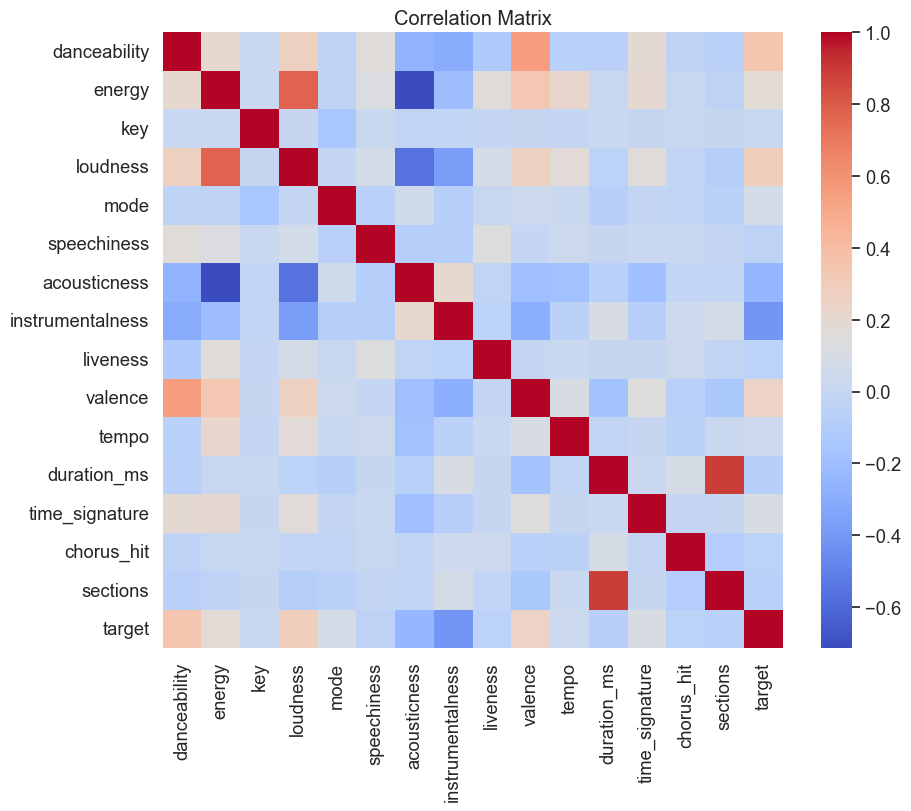

In [6]:
# get correlation matrix, display the names of the features and plot it
corr_matrix = df.corr()
sns.set(font_scale=1.2)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')

# list five features with strongest positive correlation to target excluding target itself
print('Five features with strongest positive correlation to target:')
print(corr_matrix['target'].sort_values(ascending=False).head(6))
print('')

# list five features with strongest negative correlation to target excluding target itself
print('Five features with strongest negative correlation to target:')
print(corr_matrix['target'].sort_values(ascending=True).head(6))



In [7]:
# data split for prediction
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


1. LOGISTIC REGRESSION

In [8]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
#y_pred_lr = y_pred_lr.round().astype(int)
#performance metrics of logistic regression
print('Logistic Regression')
print('MSE: ', mean_squared_error(y_test, y_pred_lr))
print('Classification Report for the Logistic Regression: ')
print(classification_report(y_test, y_pred_lr))


Logistic Regression
MSE:  0.505351495986378
Classification Report for the Logistic Regression: 
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      4067
           1       0.00      0.00      0.00      4155

    accuracy                           0.49      8222
   macro avg       0.25      0.50      0.33      8222
weighted avg       0.24      0.49      0.33      8222



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

2. LINEAR REGRESSION

In [9]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
y_pred_lreg = lreg.predict(X_test)
#visualize the predictions only without test data and gradient color
#sns.scatterplot(y_pred_lreg)
y_pred_lreg = y_pred_lr.round().astype(int)

#performance metrics of linear regression
print('Linear Regression')
print('MSE: ', mean_squared_error(y_test, y_pred_lreg))
print('Classification Report for the Linear Regression: ')
print(classification_report(y_test, y_pred_lreg))


Linear Regression
MSE:  0.505351495986378
Classification Report for the Linear Regression: 
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      4067
           1       0.00      0.00      0.00      4155

    accuracy                           0.49      8222
   macro avg       0.25      0.50      0.33      8222
weighted avg       0.24      0.49      0.33      8222



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

3. RF CLASSIFIER

In [10]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print('Random Forest')
# random forest classification report
print('MSE: ', mean_squared_error(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

Random Forest
MSE:  0.2088299683775237
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      4067
           1       0.77      0.84      0.80      4155

    accuracy                           0.79      8222
   macro avg       0.79      0.79      0.79      8222
weighted avg       0.79      0.79      0.79      8222



4. SVM

In [11]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
print("SVM:")
print('MSE: ', mean_squared_error(y_test, svm_preds))
print(classification_report(y_test, svm_preds))


SVM:
MSE:  0.3921187059109706
              precision    recall  f1-score   support

           0       0.68      0.39      0.49      4067
           1       0.58      0.82      0.68      4155

    accuracy                           0.61      8222
   macro avg       0.63      0.61      0.59      8222
weighted avg       0.63      0.61      0.59      8222



GRIDSEARCH MODELS

In [12]:
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}


5. LR WITH GRIDSEARCH

In [13]:
from sklearn.exceptions import FitFailedWarning
import warnings

warnings.filterwarnings("ignore", category=FitFailedWarning)

lr_model = LogisticRegression()
lr_grid = GridSearchCV(lr_model, lr_param_grid, cv=5, error_score=0)
lr_grid.fit(X_train, y_train)
lr_preds = lr_grid.predict(X_test)

print('Logistic Regression Grid Search')
print('MSE: ', mean_squared_error(y_test, lr_preds))
print(classification_report(y_test, lr_preds))



Logistic Regression Grid Search
MSE:  0.505351495986378
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      4067
           1       0.00      0.00      0.00      4155

    accuracy                           0.49      8222
   macro avg       0.25      0.50      0.33      8222
weighted avg       0.24      0.49      0.33      8222



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

6. RF WITH GRIDSEARCH

In [14]:
# Fit and evaluate a random forest model using GridSearchCV
rf_model = RandomForestClassifier()
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=5)
rf_grid.fit(X_train, y_train)
rf_preds = rf_grid.predict(X_test)
print("Random Forest Scores:")
print("Best hyperparameters:", rf_grid.best_params_)
print('MSE: ', mean_squared_error(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

Random Forest Scores:
Best hyperparameters: {'max_depth': 20, 'n_estimators': 200}
MSE:  0.20858671855996108
              precision    recall  f1-score   support

           0       0.83      0.73      0.77      4067
           1       0.76      0.86      0.81      4155

    accuracy                           0.79      8222
   macro avg       0.80      0.79      0.79      8222
weighted avg       0.80      0.79      0.79      8222



7. XGB WITH GRIDSEARCH

In [16]:
# fit and evaluate a xgboost model using gridsearchcv
xgb_model = GradientBoostingRegressor()
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=5)
xgb_grid.fit(X_train, y_train)
xgb_preds = xgb_grid.predict(X_test)
print("XGBoost Scores:")
print("Best hyperparameters:", xgb_grid.best_params_)
#performance for xgboost
print('MSE: ', mean_squared_error(y_test, xgb_preds))



XGBoost Scores:
Best hyperparameters: {'max_depth': 10, 'n_estimators': 50}
MSE:  0.14791295181984576


In [20]:
#pickle xgb model
pickle.dump(xgb_grid, open('xgb_model.pkl', 'wb'))


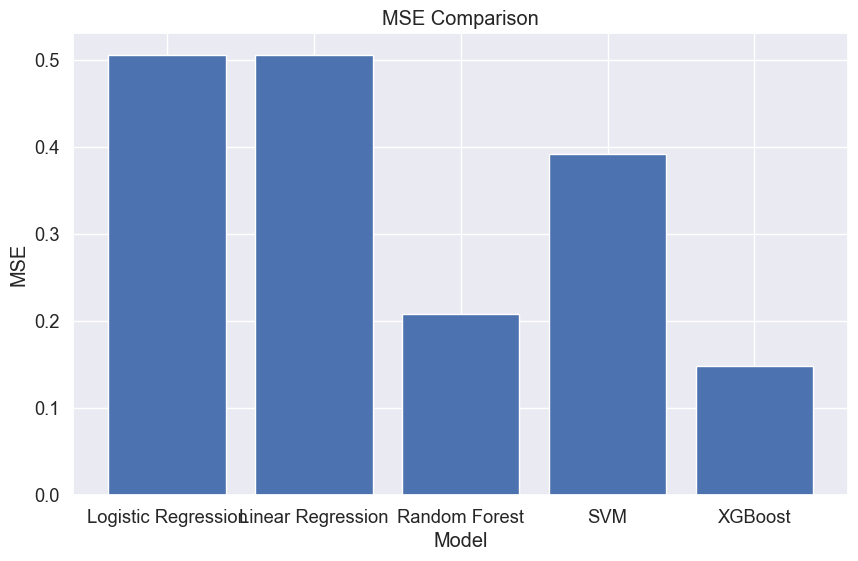

In [19]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_lreg = mean_squared_error(y_test, y_pred_lreg)
mse_rf = mean_squared_error(y_test, rf_preds)
mse_svm = mean_squared_error(y_test, svm_preds)
mse_xgb = mean_squared_error(y_test, xgb_preds)

# plot the results in ascending order

plt.figure(figsize=(10, 6))
plt.bar(['Logistic Regression', 'Linear Regression', 'Random Forest', 'SVM', 'XGBoost'], [mse_lr, mse_lreg, mse_rf, mse_svm, mse_xgb])
plt.xlabel('Model')
plt.ylabel('MSE')
#ascending order of mse results
  
plt.title('MSE Comparison')
plt.show()


In [21]:
#load pickle and test if it works
xgb_model_loaded = pickle.load(open('xgb_model.pkl', 'rb'))
print(xgb_model_loaded.predict(X_test))

[-0.01410172  0.84175508 -0.01310543 ...  0.69728629  0.00546521
  0.85578954]


8. NEURAL NETWORK (in progress)

Moritz: Tensorflow doesnt work on mac. We have to find another way for the NN

In [2]:
# from keras.models import Sequential
# from keras.layers import Dense
# # Build the neural network model
# neuralnet = Sequential()
# neuralnet.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
# neuralnet.add(Dense(32, activation='relu'))
# neuralnet.add(Dense(1, activation='sigmoid'))

# # Compile the model
# neuralnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# neuralnet.fit(X_train, y_train, epochs=10, batch_size=32)

# # Evaluate the model on the testing set
# loss, accuracy = neuralnet.evaluate(X_test, y_test)
# print("Test Loss:", loss)
# print("Test Accuracy:", accuracy)

ModuleNotFoundError: No module named 'tensorflow'